In [1]:
import os
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from concurrent.futures import ProcessPoolExecutor
import cv2
from PIL import Image

In [ ]:
results_path = "../results/512_D_CMSGGAN/MSE_with_image_standardized/"
distance_matrix_files = [path for path in os.listdir(results_path) if path.endswith("distance_matrix.csv")]

## Similarity Scores

In [ ]:
metrics = pd.DataFrame(columns=["gene", "gen_image_path", "real_image_path", "MSE"])
for path in distance_matrix_files:
    print(path)
    df = pd.read_csv(os.path.join(results_path, path), index_col="Unnamed: 0")
    df = df[["gen_image_path", "real_image_path", "MSE"]]
    df["gene"] = [path.split("_")[0]]*len(df)
    metrics = metrics.append(df)

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=metrics, x="gene", y="MSE")
plt.show()

## Quality Evaluation

In [25]:
results_path = "../results/512_D_CMSGGAN/BRISQUE/"
brisque_scores_path = os.listdir(results_path)

brisque_scores_synthetic = pd.DataFrame(columns=["gene", "Synthetic image path", "Quality Score"])
for path in brisque_scores_path:
    print(path)
    df = pd.read_csv(os.path.join(results_path, path), index_col="Unnamed: 0")
    df["gene"] = path.split("_")[0]
    brisque_scores_synthetic = brisque_scores_synthetic.append(df)
brisque_scores_synthetic["image_type"] = ["synthetic"]*len(brisque_scores_synthetic)
brisque_scores_synthetic.rename(columns={"gene":"gene", "Synthetic image path": "file.path", "Quality Score": "brisq.score"}, inplace=True)
brisque_scores_synthetic.reset_index(inplace=True, drop=True)

CNGB3_quality_scores.csv
OPA1_quality_scores.csv
RP1_quality_scores.csv
BEST1_quality_scores.csv
CNGA3_quality_scores.csv
CRX_quality_scores.csv
CERKL_quality_scores.csv
RPE65_quality_scores.csv
RP2_quality_scores.csv
CYP4V2_quality_scores.csv
USH2A_quality_scores.csv
TIMP3_quality_scores.csv
CHM_quality_scores.csv
PRPF8_quality_scores.csv
RHO_quality_scores.csv
PROML1_quality_scores.csv
BBS1_quality_scores.csv
GUCY2D_quality_scores.csv
EYS_quality_scores.csv
PRPF31_quality_scores.csv
NR2E3_quality_scores.csv
RS1_quality_scores.csv
MERTK_quality_scores.csv
MTTL1_quality_scores.csv
CACNA1F_quality_scores.csv
RP1L1_quality_scores.csv
CRB1_quality_scores.csv
RPGR_quality_scores.csv
CDH23_quality_scores.csv
EFEMP1_quality_scores.csv
MYO7A_quality_scores.csv
PRPH2_quality_scores.csv
ABCA4_quality_scores.csv
RDH12_quality_scores.csv
KCNV2_quality_scores.csv
PDE6B_quality_scores.csv


In [26]:
brisque_scores_synthetic

,gene,file.path,brisq.score,image_type
0,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,72.756371,synthetic
1,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,83.181104,synthetic
2,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,78.044518,synthetic
3,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,72.982049,synthetic
4,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,71.058576,synthetic
...,...,...,...,...
1795,PDE6B,results/data:faf_dataset_cleaned.csv_classes:c...,66.515173,synthetic
1796,PDE6B,results/data:faf_dataset_cleaned.csv_classes:c...,60.564508,synthetic
1797,PDE6B,results/data:faf_dataset_cleaned.csv_classes:c...,74.891963,synthetic
1798,PDE6B,results/data:faf_dataset_cleaned.csv_classes:c...,79.094048,synthetic


In [27]:
real_results_path = "../datasets/syntheye/faf_dataset_cleaned.csv"
real_df = pd.read_csv(real_results_path)
real_df = real_df[real_df.fold != -1]
real_df = real_df[["gene", "file.path", "brisq.score"]]
real_df["image_type"] = ["real"]*len(real_df)
real_df.reset_index(drop=True, inplace=True)

In [29]:
from brisque import BRISQUE
from tqdm import tqdm
brisq = BRISQUE()

# modify brisq values
new_brisq = np.zeros(len(real_df))
for i, row in tqdm(real_df.iterrows()):
    img = Image.open(row["file.path"])
    img = img.resize((512, 512))
    new_brisq[i] = brisq.get_score(np.array(img))
    
real_df["brisq.score"] = np.array(new_brisq)

7629it [06:12, 20.48it/s]


In [31]:
real_df

,gene,file.path,brisq.score,image_type
0,CNGA3,/media/pontikos_nas_slow/Data/NikolasPontikos/...,119.133794,real
1,CNGA3,/media/pontikos_nas_slow/Data/NikolasPontikos/...,117.970868,real
2,CNGB3,/media/pontikos_nas_slow/Data/NikolasPontikos/...,121.707155,real
3,CNGB3,/media/pontikos_nas_slow/Data/NikolasPontikos/...,122.425067,real
4,PRPH2,/media/pontikos_nas_slow/Data/NikolasPontikos/...,83.070983,real
...,...,...,...,...
7624,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,82.611984,real
7625,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,93.331446,real
7626,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,97.026676,real
7627,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,75.174052,real


## Plot distribution of scores

In [30]:
combined_df = pd.concat([brisque_scores_synthetic, real_df], axis=0)
combined_df

,gene,file.path,brisq.score,image_type
0,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,72.756371,synthetic
1,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,83.181104,synthetic
2,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,78.044518,synthetic
3,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,72.982049,synthetic
4,CNGB3,results/data:faf_dataset_cleaned.csv_classes:c...,71.058576,synthetic
...,...,...,...,...
7624,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,82.611984,real
7625,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,93.331446,real
7626,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,97.026676,real
7627,RPGR,/media/pontikos_nas_slow/Data/NikolasPontikos/...,75.174052,real


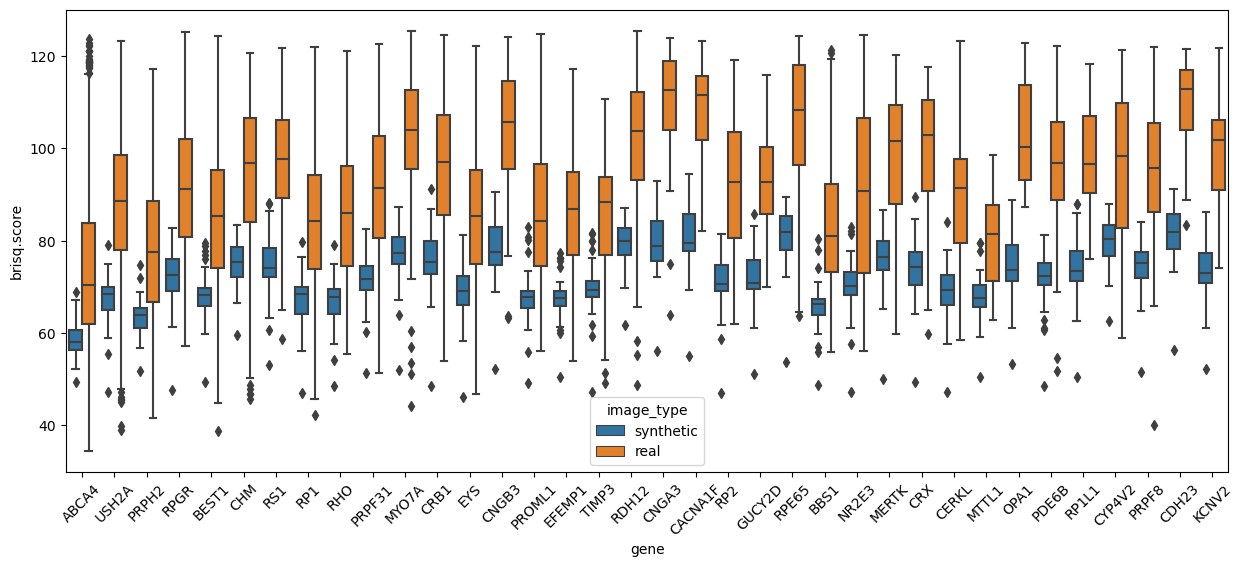

In [50]:
with open("../classes.txt") as f:
    classes = f.read().splitlines()

plt.figure(figsize=(15, 6))
sns.boxplot(data=combined_df, y="brisq.score", x="gene", hue="image_type", order=classes)
plt.xticks(rotation=45)
plt.show()